In [1]:
import pandas as pd
import numpy as np


In [2]:
customers = pd.read_csv('../../kaggle_h&m/customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [3]:
# Nettoyage de la table Customer
  ### Colonne FN
     #### Inspection colonne  
customers['FN'].head(30)
     #### Remplacement des NaN par 0
customers['FN'] = customers['FN'].fillna(0)

  ### Colonne Active
     #### Inspection colonne 
customers['Active'].head(30)
     #### Remplacement des NaN par 0
customers['Active'] = customers['Active'].fillna(0)

  ### Colonne Club member status
     #### Inspection colonne 
customers['club_member_status'].head(30)
     #### Remplacement des NaN par NON ACTIVE
customers['club_member_status'] = customers['club_member_status'].fillna('NON ACTIVE')
customers[customers['club_member_status']=='NON ACTIVE'] 

  ### Colonne Fashion News Frequency
     #### Inspection colonne 
customers['fashion_news_frequency'].head(30)     
customers[customers['fashion_news_frequency'].isna()]  # Pour voir le lien entre cette colonne (avec modalités NaN) et les autres colonnes 
     #### Option 1: Remplacement NaN par None
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')
     #### Option 2: Suppression des lignes qui ont des valeurs manquantes dans age et fashions_news_freq
#customers[(customers['fashion_news_frequency'].isna()) &(customers['age'].isna())]  --> detecter les lignes qui ont val manquantes dans 2 colonnes
#customers = customers.dropna(axis = 0, how='all', subset=['fashion_news_frequency', 'age']) --> suppression des lignes
     #### Option 3 (suggestion de Jean) -> garder les lignes avec NaN car explication logique

  ### Colonne age
     #### Inspection de la colonne 
customers['age'].head(30)
customers[customers['age'].isna()]  # Pour voir le lien entre cette colonne (avec modalités NaN) et les autres colonnes
     #### Option 1: Remplacement NaN par None
customers['age'] = customers['age'].fillna('NONE')
     #### Option 2: Remplacement par la moyenne
#customers['age'] = customers['age'].fillna(customers['age'].mean())

customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
articles = pd.read_csv('../../kaggle_h&m/articles.csv')
#Nettoyage de la table Article
 ## Detection des lignes avec valeurs manquantes
articles[articles.isna().any(axis =1)]
 ## Choix de suppression de ces lignes et création d'un nouveau df 
articles['detail_desc'] = articles['detail_desc'].fillna('')

articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
# Sélection sample du fichier transaction
transactions = pd.read_csv('../../kaggle_h&m/transactions_train.csv')
trans_sample = transactions.sample(frac = 0.05)

In [7]:
trans_sample

,t_dat,customer_id,article_id,price,sales_channel_id
14433304,2019-07-24,9ebf8139d4ac274c69ab572df513dd18d04ef5450c7679...,576897002,0.013542,2
12903417,2019-06-28,97d542656bd0a4ab02cf5c8391b73e5944301ae14e17b6...,694030003,0.033881,2
28290364,2020-06-29,1071bb534ac0209fb7a607507bd327a5ab543d26867e47...,818031001,0.008458,2
14261864,2019-07-22,8177bda6636594f39856018e833eac79afb090e8add61c...,783707002,0.004678,1
22348446,2020-02-14,85e6f0fc2195abd15c6f8f310d9926a256140fccc68bc6...,820542011,0.016932,2
...,...,...,...,...,...
27627632,2020-06-20,4d891add5f96864773164fdf845f443e50fea487519dbf...,850587004,0.014847,2
15053885,2019-08-05,78b4b1bec3a029f54f39e8f7ef70ada645dde22af0e300...,507883009,0.013542,2
5119376,2019-01-18,06a28c88f970641f7690e3524e2bf29b4c3239e1b57a28...,580770001,0.032508,2
5714909,2019-02-01,f6aa867b46fc6878efdedb8d542a8be0b5158f00216b89...,698317007,0.033881,1


In [8]:
# Jointure tables Transactions - Customers - Articles
trans_cust = trans_sample.merge(customers, on = 'customer_id', how='left')
trans_cust_art = trans_cust.merge(articles, on='article_id', how='left')
trans_cust_art.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2019-07-24,9ebf8139d4ac274c69ab572df513dd18d04ef5450c7679...,576897002,0.013542,2,1.0,1.0,ACTIVE,Regularly,48.0,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,"Short, off-the-shoulder top in a soft, ribbed ..."
1,2019-06-28,97d542656bd0a4ab02cf5c8391b73e5944301ae14e17b6...,694030003,0.033881,2,0.0,0.0,ACTIVE,NONE,61.0,...,Functional Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Microfibre dress with a gentle sculpting effec...
2,2020-06-29,1071bb534ac0209fb7a607507bd327a5ab543d26867e47...,818031001,0.008458,2,1.0,1.0,ACTIVE,Regularly,36.0,...,Jersey fancy,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1005,Jersey Fancy,Fitted top in soft jersey made from a cotton b...
3,2019-07-22,8177bda6636594f39856018e833eac79afb090e8add61c...,783707002,0.004678,1,0.0,0.0,ACTIVE,NONE,47.0,...,Socks Wall,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, jacquard-knit cotton blend wi..."
4,2020-02-14,85e6f0fc2195abd15c6f8f310d9926a256140fccc68bc6...,820542011,0.016932,2,1.0,1.0,ACTIVE,Regularly,45.0,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Straight-style T-shirt in soft cotton jersey w...


In [9]:
trans_cust_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589416 entries, 0 to 1589415
Data columns (total 35 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   t_dat                         1589416 non-null  object 
 1   customer_id                   1589416 non-null  object 
 2   article_id                    1589416 non-null  int64  
 3   price                         1589416 non-null  float64
 4   sales_channel_id              1589416 non-null  int64  
 5   FN                            1589416 non-null  float64
 6   Active                        1589416 non-null  float64
 7   club_member_status            1589416 non-null  object 
 8   fashion_news_frequency        1589416 non-null  object 
 9   age                           1589416 non-null  object 
 10  postal_code                   1589416 non-null  object 
 11  product_code                  1589416 non-null  int64  
 12  prod_name                   

In [18]:
#Inspection des colonnes
trans_cust_art.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'postal_code', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [20]:
#Création d'un nouveau df avec colonnes pertinentes
tcas = trans_cust_art[['t_dat', 'customer_id', 'article_id', 'price','age','postal_code','detail_desc']]
tcas.head()

,t_dat,customer_id,article_id,price,age,postal_code,detail_desc
0,2019-07-24,9ebf8139d4ac274c69ab572df513dd18d04ef5450c7679...,576897002,0.013542,48.0,970335abe182c66d416e6c26e8dbc5ba1be30408d4d6e9...,"Short, off-the-shoulder top in a soft, ribbed ..."
1,2019-06-28,97d542656bd0a4ab02cf5c8391b73e5944301ae14e17b6...,694030003,0.033881,61.0,6891b146814c087790704ffefac27a28cf87bc0aa20c6c...,Microfibre dress with a gentle sculpting effec...
2,2020-06-29,1071bb534ac0209fb7a607507bd327a5ab543d26867e47...,818031001,0.008458,36.0,d6728fb891ab52d94c3986a9d264cbaeb7c7e44e56bcef...,Fitted top in soft jersey made from a cotton b...
3,2019-07-22,8177bda6636594f39856018e833eac79afb090e8add61c...,783707002,0.004678,47.0,8115d189e236dd602c142308e017d24290471262fb1939...,"Socks in a soft, jacquard-knit cotton blend wi..."
4,2020-02-14,85e6f0fc2195abd15c6f8f310d9926a256140fccc68bc6...,820542011,0.016932,45.0,a985d3285ea7bfc9c24c5860df307116e68e0ea9120fe0...,Straight-style T-shirt in soft cotton jersey w...


In [28]:
#Df avec les articles les plus populaires 
best_sales = tcas[['article_id']].groupby('article_id', as_index =False).agg(count = ('article_id', 'count'))
#12 best sales 
best12 = best_sales.head(12)
best12

,article_id,count
0,108775015,543
1,108775044,349
2,108775051,11
3,110065001,47
4,110065002,29
5,110065011,47
6,111565001,278
7,111565003,2
8,111586001,726
9,111593001,692


In [24]:
# Df du nombre d'articles (par ordre décroissant) achetés par clients 
art_sold_per_cust = tcas[['article_id', 'customer_id']].groupby(['article_id', 'customer_id'], 
                                                              as_index =False).agg(count = ('article_id', 'count'))
art_sold_per_cust = art_sold_per_cust.sort_values(by='count', ascending=False)
art_sold_per_cust

,article_id,customer_id,count
550261,678342001,d00063b94dcb1342869d4994844a2742b5d62927f36843...,34
1030197,756322001,0152964ef19824d631d28ee3327a010fbfc528cdaf5bf0...,10
234730,570004009,ce79a54991bb7c2c2d9427ae1e7f1d8c8b037f8d74b2fe...,9
117275,507909001,61da44a2758206d5701771f4315637b40c8321b5111916...,8
317141,607642008,9c23e0fc07795d624a76cf77dfa565e788685424b4fa19...,8
...,...,...,...
527498,673643001,c4cee519ae062d1e3610266d505e055d889f084242a196...,1
527497,673643001,bf3de705ceb18c902e92d6f26076a4964f728ff695759f...,1
527496,673643001,b7ddd5f0637b11d7c87e3e61c255d5454ab053cc4b0d3c...,1
527495,673643001,b4d159e3d6ac2613c596c589052434157f697347d03c17...,1


In [26]:
# Df avec colonnes customer_id and article_id
cust_art = tcas[['customer_id', 'article_id']]
cust_art

,customer_id,article_id
0,9ebf8139d4ac274c69ab572df513dd18d04ef5450c7679...,576897002
1,97d542656bd0a4ab02cf5c8391b73e5944301ae14e17b6...,694030003
2,1071bb534ac0209fb7a607507bd327a5ab543d26867e47...,818031001
3,8177bda6636594f39856018e833eac79afb090e8add61c...,783707002
4,85e6f0fc2195abd15c6f8f310d9926a256140fccc68bc6...,820542011
...,...,...
1589411,4d891add5f96864773164fdf845f443e50fea487519dbf...,850587004
1589412,78b4b1bec3a029f54f39e8f7ef70ada645dde22af0e300...,507883009
1589413,06a28c88f970641f7690e3524e2bf29b4c3239e1b57a28...,580770001
1589414,f6aa867b46fc6878efdedb8d542a8be0b5158f00216b89...,698317007


In [29]:
# Jointure pour obtenir les id des 12 meilleurs articles et la Q vendue par customer id 
bartcust_12 = best12.merge(cust_art, on='article_id', how='inner')
bartcust_12

,article_id,count,customer_id
0,108775015,543,268ee6e7629bd88302d28ca5b81026b4d5714a6e13ec69...
1,108775015,543,81bbcfde750ed3bfd6ee03ccfe6aec12d48c8280acaf47...
2,108775015,543,218308edd3101beba3a6d03adcaed143fd2b4b9e8e1cf1...
3,108775015,543,e906358c57601e2bdab6d17823b9949b75219ea7aed58d...
4,108775015,543,c855b0b9545a14205c28e6a8bd0a3f205e5b2805fda950...
...,...,...,...
2880,111609001,158,3e64926452101d094b50be01f92dd8c1586b2975eeb38c...
2881,111609001,158,b6405abeac5adad0fafdf1a001591957bfed0d25cf993e...
2882,114428030,3,2224873e69757fdd09f2fa4d93d029894d446f192c2486...
2883,114428030,3,8fb418c6c90f4f98c5b3ed80166f0c251b1cad58d64c47...


In [30]:
# Df du nombre d'articles achetés selon la tranche d'âge 
art_age = tcas.groupby(['article_id', 'age'], as_index=False).agg(
  unique_articles = ('article_id', 'count')
)
art_age

,article_id,age,unique_articles
0,108775015,17.0,1
1,108775015,18.0,1
2,108775015,19.0,6
3,108775015,20.0,9
4,108775015,21.0,17
...,...,...,...
821687,949551002,44.0,1
821688,952267001,28.0,1
821689,952267001,49.0,1
821690,953450001,17.0,1


In [31]:
#Jointure avec le df des 12 meilleurs articles 
art_age_best12 = art_age.merge(best12, on='article_id', how='inner')
art_age_best12 = art_age_best12.drop('count', axis=1)
   ## Suppression des string NONE
art_age_best12 = art_age_best12.replace(to_replace='NONE', value=np.nan).dropna()
art_age_best12

,article_id,age,unique_articles
0,108775015,17.0,1
1,108775015,18.0,1
2,108775015,19.0,6
3,108775015,20.0,9
4,108775015,21.0,17
...,...,...,...
372,111609001,69.0,1
373,111609001,73.0,1
375,114428030,23.0,1
376,114428030,33.0,1


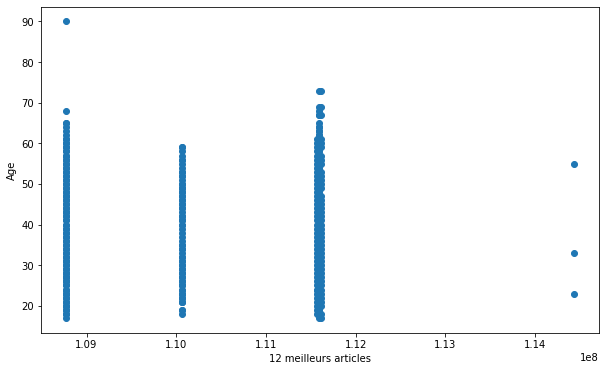

In [32]:
# Représentation graphique des achats par âge
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10,6))
plt.scatter(art_age_best12.article_id, art_age_best12.age);
plt.xlabel('12 meilleurs articles')
plt.ylabel('Age');

In [35]:
best12

,article_id,count
0,108775015,543
1,108775044,349
2,108775051,11
3,110065001,47
4,110065002,29
5,110065011,47
6,111565001,278
7,111565003,2
8,111586001,726
9,111593001,692


In [36]:
# Remplacement des index des articles du df Best 12 pour une meilleure représentation graphique
best12_simplified = best12.replace(to_replace =[108775015, 108775044, 108775051, 110065001, 110065002,
                                                110065011, 111565001, 111565003, 111586001, 111593001,
                                                111609001, 114428030 ], value = [1,2,3,4,5,6,7,8,9,10,11,12])
best12_simplified

,article_id,count
0,1,543
1,2,349
2,3,11
3,4,47
4,5,29
5,6,47
6,7,278
7,8,2
8,9,726
9,10,692


In [37]:
# Affecter ce changement d'index des articles au df Article Age best 12
art_age_best12_new = art_age_best12.replace(to_replace =[108775015, 108775044, 108775051, 110065001, 110065002,
                                                110065011, 111565001, 111565003, 111586001, 111593001,
                                                111609001, 114428030], value = [1,2,3,4,5,6,7,8,9,10,11,12])
art_age_best12_new

,article_id,age,unique_articles
0,1,17.0,1
1,1,18.0,1
2,1,19.0,6
3,1,20.0,9
4,1,21.0,17
...,...,...,...
372,11,69.0,1
373,11,73.0,1
375,12,23.0,1
376,12,33.0,1


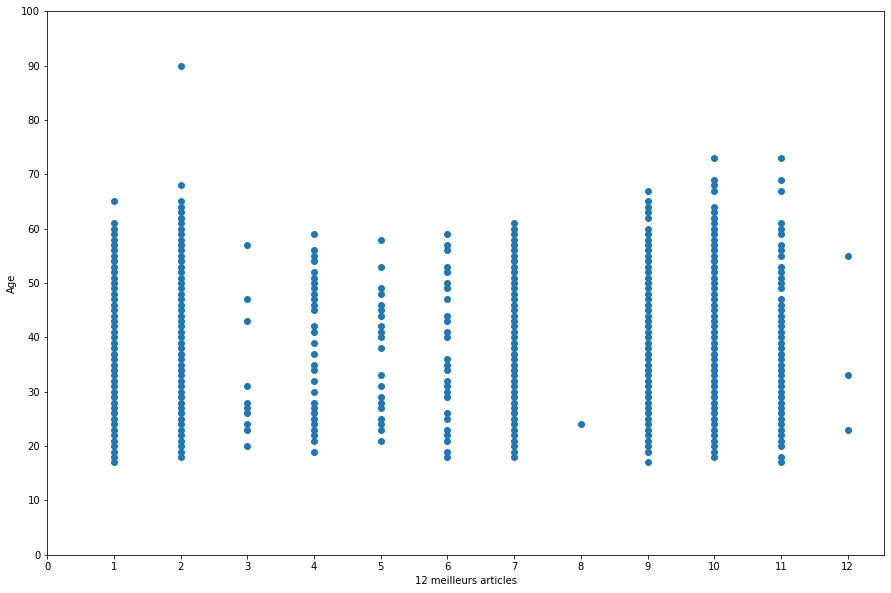

In [46]:
# Nouvelle représentation graphique
plt.figure(figsize=(15,10))
plt.scatter(art_age_best12_new.article_id, art_age_best12_new.age)
plt.xticks(np.arange(0,13,step=1))
plt.yticks(np.arange(0,110, step=10))
plt.xlabel('12 meilleurs articles')
plt.ylabel('Age');  

In [47]:
# Ajout de bins d'âge 
bin_list = [0, 19, 29, 39, 49, 59, 69, 91]
art_age_best12_new['age_bins'] = pd.cut(art_age_best12_new.age, bin_list)
art_age_best12_new

,article_id,age,unique_articles,age_bins
0,1,17.0,1,"(0, 19]"
1,1,18.0,1,"(0, 19]"
2,1,19.0,6,"(0, 19]"
3,1,20.0,9,"(19, 29]"
4,1,21.0,17,"(19, 29]"
...,...,...,...,...
372,11,69.0,1,"(59, 69]"
373,11,73.0,1,"(69, 91]"
375,12,23.0,1,"(19, 29]"
376,12,33.0,1,"(29, 39]"


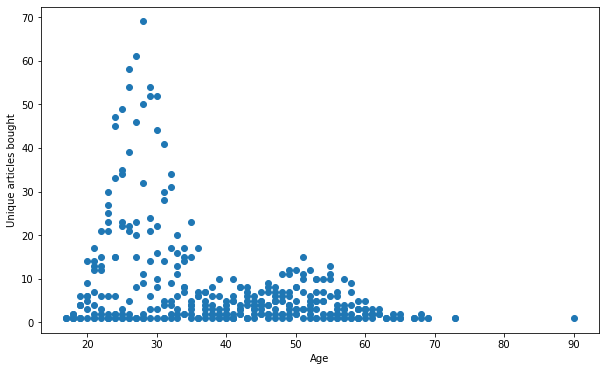

In [49]:
#Représentation graphique du nombre d'articles achetés par age
plt.figure(figsize=(10,6))
plt.scatter(art_age_best12_new.age, art_age_best12_new.unique_articles)
plt.xlabel('Age')
plt.ylabel('Unique articles bought');